In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import matplotlib; matplotlib.style.use('ggplot')

from pandas import set_option
set_option("display.max_rows", 16)
LARGE_FIGSIZE = (12,8)

%matplotlib inline

In [36]:
from subprocess idf_train = pd.read_csv("../Kaggle Data/train_2016.csv")mport check_output   #accessing system commands
print(check_output(["dir","../Kaggle Data/*.csv"],shell = True).decode("utf8"))

SyntaxError: invalid syntax (<ipython-input-36-fc1b98e00bb6>, line 1)

In [2]:
df_train = pd.read_csv("../Kaggle Data/train_2016.csv")

In [3]:
df_train.head(5)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [4]:
df_train_date = pd.read_csv("../Kaggle Data/train_2016.csv",parse_dates =[2])

In [5]:
df_train_date_grouped = df_train_date.groupby('transactiondate')['logerror'].mean().reset_index()
df_train_date_grouped.head(5)

,transactiondate,logerror
0,2016-01-01,-0.048267
1,2016-01-02,-0.008150
2,2016-01-03,0.007736
3,2016-01-04,0.002742
4,2016-01-05,0.014271


In [6]:
#df_train_date_grouped = pd.DataFrame(df_train_date_grouped, index = df_train_date_grouped[0], columns = df_train_date_grouped[1], dtype = 'object')
df_train_date_grouped.index = df_train_date_grouped.transactiondate
df_train_date_grouped = df_train_date_grouped.drop('transactiondate',1)
df_train_date_grouped.head(5)

,logerror
transactiondate,
2016-01-01,-0.048267
2016-01-02,-0.008150
2016-01-03,0.007736
2016-01-04,0.002742
2016-01-05,0.014271


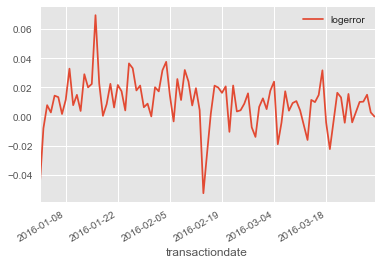

In [7]:
df_train_date_grouped['2016-01':'2016-03'].plot()

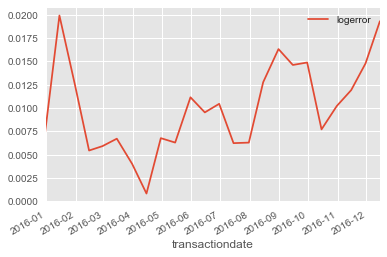

In [8]:
# semi-month end frequency (15th and end of month)
df_train_date_grouped.resample('SM').mean().plot()

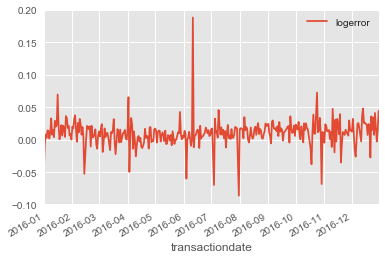

In [9]:
df_train_date_grouped.plot()

In [10]:
# define function to compare two years in same frame
def compare_hist(month1,month2):
    #f, (ax1) = plt.subplots(1,figsize=LARGE_FIGSIZE)
    plt.hist(data= df_train_date_grouped[month1],x = df_train_date_grouped[month1].index.day, color='blue');
    plt.hist(data= df_train_date_grouped[month2],x = df_train_date_grouped[month2].index.day, color='red');
    plt.xlabel('day')
    plt.ylabel('logerror')
    plt.title(str(month1) + " vs " + str(month2))

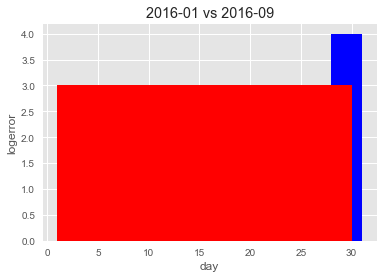

In [11]:
compare_hist('2016-01','2016-09')

In [48]:
heights, labels = [], []
for key, val in df_train_date_grouped['2016-09'].iteritems():
    labels.append(key)
    heights.append(val)

In [49]:
heights

[transactiondate
 2016-09-01    0.024459
 2016-09-02    0.011258
 2016-09-03    0.005167
 2016-09-04   -0.005825
 2016-09-05    0.027833
 2016-09-06    0.029593
 2016-09-07    0.017696
 2016-09-08    0.016198
                 ...   
 2016-09-23    0.020934
 2016-09-24   -0.004600
 2016-09-25    0.035967
 2016-09-26    0.017802
 2016-09-27    0.010317
 2016-09-28    0.011362
 2016-09-29    0.021704
 2016-09-30    0.005637
 Name: logerror, dtype: float64]

In [50]:
df_heights = pd.DataFrame.from_records(heights)
df_heights = df_heights.unstack()
df_heights.shape

(30,)

In [51]:
df_heights

transactiondate   
2016-09-01       0    0.024459
2016-09-02       0    0.011258
2016-09-03       0    0.005167
2016-09-04       0   -0.005825
2016-09-05       0    0.027833
2016-09-06       0    0.029593
2016-09-07       0    0.017696
2016-09-08       0    0.016198
                        ...   
2016-09-23       0    0.020934
2016-09-24       0   -0.004600
2016-09-25       0    0.035967
2016-09-26       0    0.017802
2016-09-27       0    0.010317
2016-09-28       0    0.011362
2016-09-29       0    0.021704
2016-09-30       0    0.005637
dtype: float64

In [52]:
indexes = np.arange(len(df_train_date_grouped['2016-09']))  
#width = 0.4
indexes.shape

(30,)

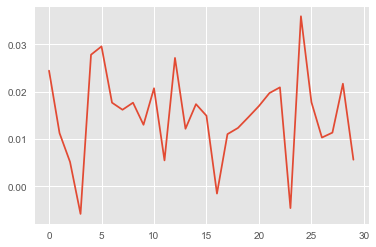

In [53]:
fig, ax = plt.subplots()
ax.plot(indexes, df_heights)

#ax.set_xticks(indexes+width)
#ax.set_xticklabels(labels)

In [75]:
# define function to compare two years in same frame
def compare_plot_2(month1,month2):
    heights_1, labels_1 = [], []
    for key, val in df_train_date_grouped[month1].iteritems():
        labels_1.append(key)
        heights_1.append(val)
 
    heights_2, labels_2 = [], []
    for key, val in df_train_date_grouped[month2].iteritems():
        labels_2.append(key)
        heights_2.append(val)
        
    indexes_1 = np.arange(len(df_train_date_grouped[month1])) 
    df_heights_1 = pd.DataFrame.from_records(heights_1)
    df_heights_1 = df_heights_1.unstack()
   
    indexes_2 = np.arange(len(df_train_date_grouped[month2])) 
    df_heights_2 = pd.DataFrame.from_records(heights_2)
    df_heights_2 = df_heights_2.unstack()
    
    f, ax = plt.subplots()
    ax.plot(indexes_1, df_heights_1, color='blue');
    ax.plot(indexes_2 ,df_heights_2, color='red');



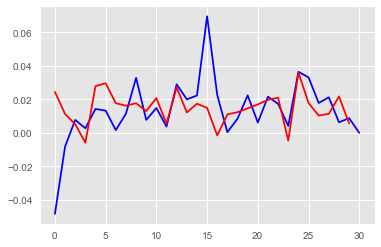

In [76]:
compare_plot_2('2016-01','2016-09')

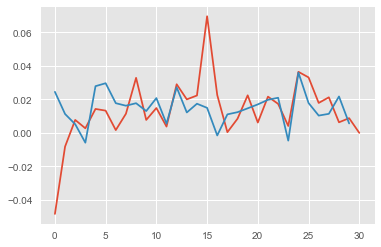

In [62]:
    month1 = '2016-01'
    month2 = '2016-09'
    
    plt.figure()
    
    heights_1, labels_1 = [], []
    for key, val in df_train_date_grouped[month1].iteritems():
        labels_1.append(key)
        heights_1.append(val)
 
    heights_2, labels_2 = [], []
    for key, val in df_train_date_grouped[month2].iteritems():
        labels_2.append(key)
        heights_2.append(val)
        
    indexes_1 = np.arange(len(df_train_date_grouped[month1])) 
    df_heights_1 = pd.DataFrame.from_records(heights_1)
    df_heights_1 = df_heights_1.unstack()
   
    indexes_2 = np.arange(len(df_train_date_grouped[month2])) 
    df_heights_2 = pd.DataFrame.from_records(heights_2)
    df_heights_2 = df_heights_2.unstack()
    
    fig, ax = plt.subplots()
    ax.plot(indexes_1, df_heights_1)
    ax.plot(indexes_2, df_heights_2)
    


In [78]:
df_train_date_grouped.index.dayofweek

array([4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3,